# Introduction
In the last class we introduced omitted variable bias. We saw that regression parameters don't always coincide with the economic parameters we're interested in. Moreover, we began to see something a little more subtle at work. That some variation is somehow contaminated. To better understand this contamination consider the object of interest in our demand and supply example. By definition, our parameter of interest was $a_1$ in the labor supply relationship

$$
W = a_0 + a_1H + U + V,
$$

where $1/a_1$ can be interpreted as the unit change in hours $H$ associated with a 1 unit increase in wages $W$ *holding everything else constant*. In an ideal world, the variation in the data, that is variation across individuals $i=1,...,N$ in our sample, would only reflect "useful" variation for the identification of $a_1$. That is, movements along the supply curve. We illustrate the difference below.

In [1]:
set.seed(210)
N = 25
b0 = 1.5
a0 = 1
a1 = 1

U = runif(N, -0.5, 0.5)
V = runif(N, -0.5, 0.5)

H = (b0 - a0)/a1 - V/a1
W = b0 + U

data = cbind(W, H)
data[1:10,]

W,H
1.512010,0.6278711
1.835127,0.5365867
1.893077,0.3081297
1.446060,0.9882858
1.298304,0.4645355
1.081275,0.5637977
1.277436,0.9689383
1.038611,0.5856522
1.463393,0.3026247
1.200980,0.5672586


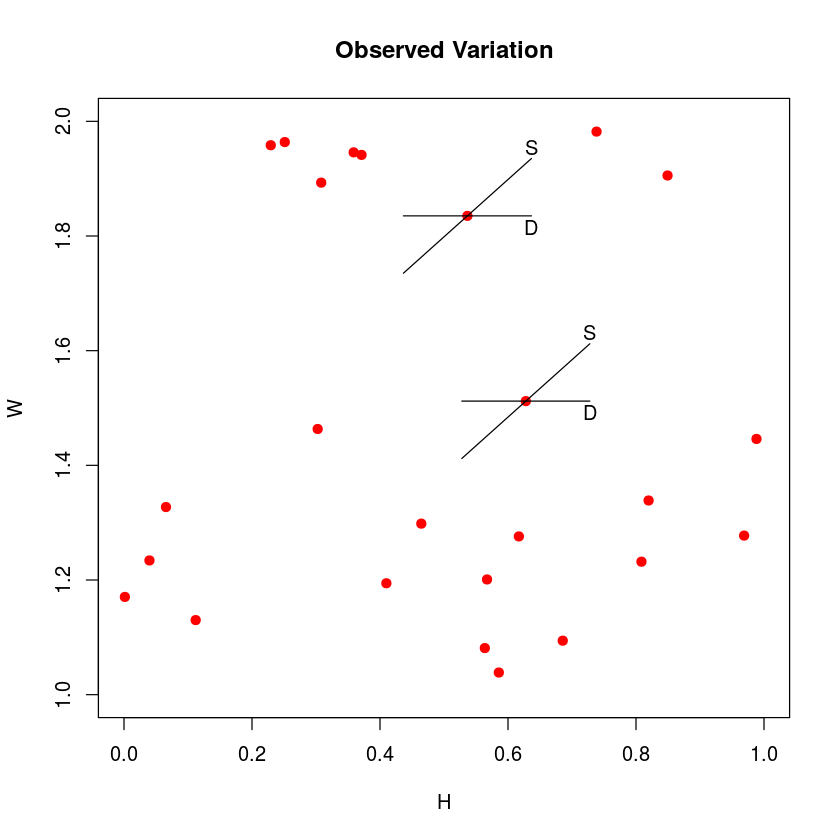

In [18]:
plot(x=H, y=W, pch=21, bg='red', col='red', cex=1,
    main="Observed Variation", xlim=c(0,1), ylim=c(1,2))
x1 = seq(H[1] - 0.1, H[1] + 0.1, length.out=100)
x2 = seq(H[2] - 0.1, H[2] + 0.1, length.out=100)
lines(x=x1, y=rep(W[1], 100))
text(H[1] + 0.1, W[1] - 0.02, "D")
lines(x=x2, y=rep(W[2], 100))
text(H[2] + 0.1, W[2] - 0.02, "D")

lines(x=x1, y=a0 + a1*x1 + U[1] + V[1])
text(H[1] + 0.1, a0 + a1*(H[1] + 0.1) + U[1] + V[1] + 0.02, "S")
lines(x=x2, y=a0 + a1*x2 + U[2] + V[2])
text(H[2] + 0.1, a0 + a1*(H[2] + 0.1) + U[2] + V[2] + 0.02, "S")

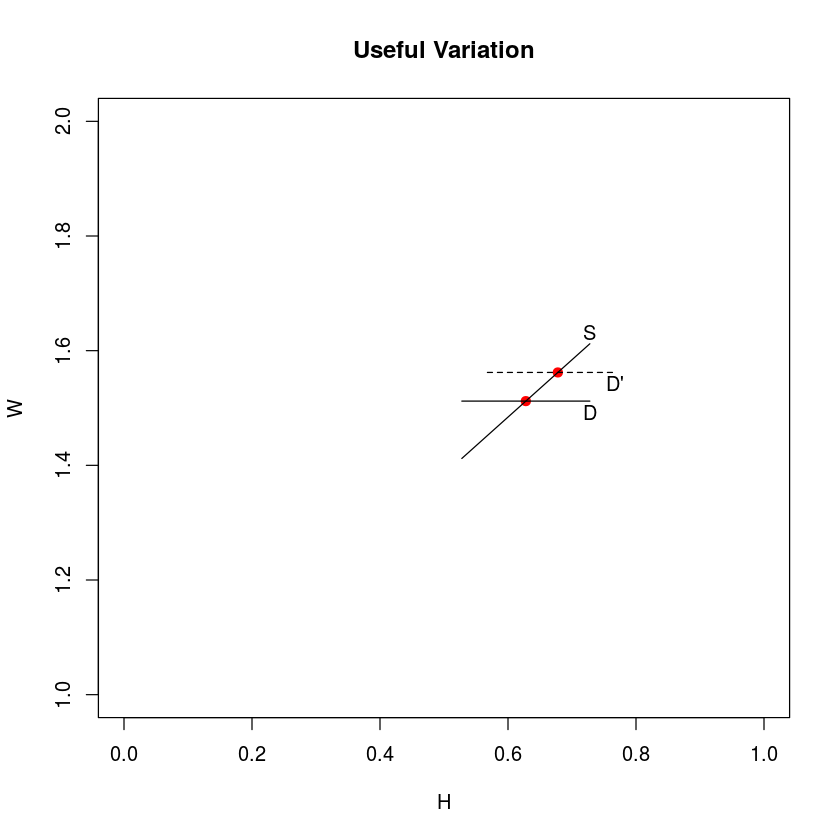

In [33]:
X = c(H[1], (W[1] + 0.05 - a0 - U[1] - V[1])/a1)
Y = c(W[1], W[1] + 0.05)
plot(X, Y, pch=21, bg='red', col='red', cex=1,
    main="Useful Variation", xlim=c(0,1), ylim=c(1,2),
    xlab="H", ylab="W")
lines(x=x1, y=rep(W[1], 100))
text(H[1] + 0.1, W[1] - 0.02, "D")
lines(x=x1 + 0.04, rep(W[1] + 0.05, 100), lty='dashed')
text(H[1] + 0.1 + 0.04, W[1] - 0.02 + 0.05, "D'")
lines(x=x1, y=a0 + a1*x1 + U[1] + V[1])
text(H[1] + 0.1, a0 + a1*(H[1] + 0.1) + U[1] + V[1] + 0.02, "S")

In the bottom plot, the variation in the data is generated by the intersection between a single supply curve and two demand curves. Thus, the change in hours worked $H$ occurs holding $U$ and $V$, the other determinants of the supply curve, fixed. This is the *ceterus parabus* (all else constant) effect of wages on hours worked (more specifically, the reciprocal of this effect).

But on the top plot, the data is generated by any intersection of supply and demand, so that variation in $H$ is not informative for mapping out the supply curve.

This illustration is informative of the frustration that comes with empirical work in economics. But it also provides some hope. For if we can isolate variation in $H$ induced by shifts in the demand curve that are independent of supply, we should be able to come up with a better estimator for $a_1$. This brings us to our next topic.

# The IV Estimator
Suppose that our model of labor supply and demand now includes some demand shifters. For instance, suppose we are concerned with the supply and demand for labor in the farming industry. The quality of the soil in particular areas can be indexed by the variable $Q$. The quality of soil will affect the types of crops grown in the area and therefore also the marginal product of labor, as crops vary in their labor intensity. There is no migration of workers across areas, so that each worker will choose her hours according to wages in their particular area. We can write the labor supply and demand functions as follows:

$$
g(H,V,U) = a_0 + a_1H + U + V
$$
$$
f(U,Z) = b_0 + b_1Q + U.
$$

Thus, our labor supply function is unchanged from our first example, but our demand function now includes the shifter $b_1Q$, which is excluded from supply. Now we can solve for equilibrium labor supply as before to obtain hours worked $H$ and wages $W$:

$$
H = \frac{b_0-a_0 + b_1Q - V}{a_1}
W = b_0 + b_1Q + U.
$$

We assume that $E[QV]=0$ and $E[QU]=0$. This assumption is reasonable because it is unlikely the soil quality will affect one's desire to work on a particular farm. Now let us propose an exercise that occurs in two steps: 
1. regress $H$ on $Q$ to obtain $\bar{H}\equiv BLP(H|Q) = Z'\pi$ where $Z\equiv (1,Q)'$ and $\pi=(\pi_0,\pi_1)'$
    - Note, with data $(W_i,H_i,Q_i)_{i=1}^N$, let $Y_i=W_i$, $X_i=(1,H_i)'$ and $Z_i=(1,Q_i)'$
    - Then the first stage OLS estimator is $\hat{\pi}_N = (\sum_{i=1}^NZ_iZ_i')^{-1}\sum_{i=1}^NZ_iX_i'$
2. regress $W$ on $\bar{H}$
    - Note that the second stage estimator is $\hat{\beta}^{IV}_N = (\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N)^{-1}\sum_{i=1}^N\hat{\pi}_N'Z_iY_i$

Call the outcome of this two step regression $\beta^{IV}$, IV estimand. We can write the slope parameter as
$$
\beta^{IV}_1 = \frac{Cov[\bar{H}, W]}{Var[\bar{H}]} = \frac{Cov[Z'\pi, W]}{Var[Z'\pi]}
$$
$$
= \frac{\pi_1Cov[Q, W]}{\pi_1^2Var[Q]} = \frac{Cov[Q, a_0 + a_1H + U + V]}{\pi_1Var[Q]}
$$
$$
= \frac{a_1Cov[Q,H]}{\pi_1Var[Q]} = \frac{a_1Cov[Q, Z'\pi + \tilde{H}]}{\pi_1Var[Q]} = \frac{a_1Cov[Q, Z'\pi]}{\pi_1Var[Q]}
$$
$$
= \frac{a_1\pi_1Var[Q]}{\pi_1Var[Q]} = a_1. 
$$
where as usual, $\tilde{H} = H - BLP(H|Q) = H - Z'\pi$. We have shown that $\beta^{IV}_1$ is unbiased. Thus, provided the estimator obtained using OLS for stages 1 and 2, $\hat{\beta}^{IV}_{1,N}$ will converge in probability to $\beta^{IV}_1$ (one can prove this with a simple application of the CMT) then it will converge to $a_1$. 

What we have just seen is an example of IV estimation. Let's simulate some data and compare the IV estimator to the OLS estimator for the slope coefficient. For our simulation we assume the following:
- $b_0 = 0.5$, $b_1=1$, $a_0=0$ and $a_1=1$
- $U\sim U[-0.5,0.5]$, $V\sim U[-0.5,0.5]$, $Q\sim U[0, 1]$ where $Q$, $U$ and $V$ are drawn independently

In [34]:
set.seed(210)
N = 1000
b0 = 0.5
b1 = 1
a0 = 0
a1 = 1

U = runif(N, -0.5, 0.5)
V = runif(N, -0.5, 0.5)
Q = runif(N, 0, 1)

H = (b0 - a0 + b1*Q - V)/a1
W = b0 + b1*Q + U

data = cbind(W, H, Q)
data[1:10,]

W,H,Q
0.7730008,1.1838566,0.2609907
1.0822824,0.9885367,0.2471553
1.7655344,1.5372645,0.8724575
1.1756345,0.9477069,0.7295744
0.4508448,0.2022213,0.1525409
0.7870570,1.4292396,0.7057821
0.4299313,0.3913552,0.1524948
1.0368130,1.7614255,0.9982024
1.0962454,0.6914481,0.6328525
0.6866669,0.6747809,0.4856873


In [35]:
X = cbind(rep(1, N), data[,2])
Z = cbind(rep(1, N), data[,3])
Y = data[,1]

reg = function(Y, X){solve(t(X)%*%X)%*%t(X)%*%Y}
X.bar = Z%*%reg(X, Z)
b.iv = reg(Y, X.bar)
b.iv[2]

[1] 1.01232

What would happen if we just used OLS? Let's work it out and then confirm using our simulated data.
$$
\beta^{OLS}_1 = \frac{Cov[H,W]}{Var[H]} = \frac{Cov[H, a_0 + a_1H + U + V]}{Var[H]}
$$
$$
= a_1 + \frac{Cov[H,U+V]}{Var[H]} = a_1 + \frac{Cov[\frac{b_0-a_0 + b_2Q - V}{a_1},U+V]}{Var[\frac{b_0-a_0 + b_2Q - V}{a_1}]}
$$
$$
= a_1 - \frac{\frac{1}{a_1}Var[V]}{\left(\frac{b_2}{a_1}\right)^2Var[Q] + \frac{1}{a_1^2}Var[V]}
$$
where for our simulation we have $Var[V] = \frac{1}{12}(0.5 - (-0.5))^2 = \frac{1}{48}$, $Var[Q] = \frac{1}{12}(0.5 - (-0.5))^2 = \frac{1}{48}$, $a_1=1$ and $b_1=1$ so that $\beta^{OLS}_1 = 0.5$. And indeed, our OLS estimator below is very close to $0.5$ and is badly biased as an estimator for $a_1=1$.

In [36]:
b.ols = reg(Y, X)
b.ols[2]

[1] 0.4780415

# The IV Estimand, General Notation

Let $Y$ be the outcome of interest and $X=(1,X_1)'$. Let the instrument vector be denoted as $Z=(1,Z_1)'$. Our structural model is
$$
Y = X'\gamma + \epsilon
$$
where $E[Z\epsilon] = 0$, $Cov[X_1,Z_1]\neq 0$, and $E[XX']$, $E[ZZ']$ and $E[ZX']$ are invertible. Furthermore, write $BLP(X|Z) = \pi'Z$, i.e., so that $\pi = E[ZZ']^{-1}E[ZX']$. Then we can write the IV estimand as
$$
\beta^{IV} = E[\pi'ZZ'\pi]^{-1}E[\pi'ZY] = E[\pi'ZZ'((E[ZZ']^{-1}E[ZX']))]^{-1}E[\pi'ZY]
$$
$$
= E[ZX']^{-1}(E[ZZ']^{-1})^{-1}E[ZZ']^{-1}(\pi')^{-1}\pi'E[ZY]
$$
$$
= E[ZX']^{-1}E[ZY]
$$
where the last equality is a common way to write the IV estimand. It follows that since $E[Z\epsilon] = 0$, that
$$
\beta^{IV} = E[ZX']^{-1}E[Z(X'\gamma + \epsilon)] = \gamma + E[ZX']^{-1}E[Z\epsilon] = \gamma.
$$
But looking at just the slope parameter, we have an even simpler form. It turns out that
$$
\beta^{IV}_1 = \frac{Cov[Y,Z_1]}{Cov[X_1,Z_1]}
$$
$$
= \frac{Cov[\gamma_0 + \gamma_1X_1 + \epsilon,Z_1]}{Cov[X_1,Z_1]} = \gamma_1 + \frac{Cov[\epsilon,Z_1]}{Cov[X_1,Z_1]} = \gamma_1.
$$
Thus, if we let $\beta_{YZ,1} = Cov[Y,Z_1]/Var[Z_1]$ (the slope parameter from a regression of $Y$ on $Z_1$) and $\beta_{XZ,1}=Cov[X_1,Z_1]/Var[Z_1]$ (the slope parameter from a regression of $X_1$ on $Z_1$), then we could write
$$
\beta^{IV}_1 = \frac{\beta_{YZ,1}}{\beta_{XZ,1}}.
$$

## The IV Estimator
The IV estimator is
$$
\hat{\beta}^{IV} = (\boldsymbol{Z}'\boldsymbol{X})^{-1}\boldsymbol{Z}'\boldsymbol{Y}
$$
where $\boldsymbol{Z}$ is an $N\times 2$ matrix, $\boldsymbol{X}$ is an $N\times 2$ matrix and $\boldsymbol{Y}$ is an $N\times 1$ vector. This is equivalent to performing regression in two steps:
1. (First Stage) Perform OLS regression of $X_1$ on $Z_1$ and a constant to obtain $\hat{X}_1=\hat{\pi}_0 + \hat{\pi}_1Z_1$
2. (Second Stage) Perform OLS regression of $Y$ on $\hat{X}_1$ to obtain $\hat{\beta}^{IV}=(\hat{\beta}_0^{IV},\hat{\beta}_1^{IV})\overset{p}{\to}\beta^{IV}=\gamma$.

## Valid Instruments
We need the instrument to satisfy three conditions:
1. Exclusion: $Z_1$ must not be part of the structural equation
2. Exogeneity: $E[Z_1\epsilon]=0$, the instrument is not correlated with unobserved determinants of $Y$
3. Relevance: $Cov[Z_1,X_1]\neq 0$, the instrument is correlated with $X_1$

The intuition behind an instrument is therefore to provide identifying variation in $X_1$ to capture the *ceterus parabus* or "all else equal" effect of $X_1$ on $Y$. If $Z_1$ violated Exclusion it would mean that $Z_1$ has its own effect on $Y$ and could not be used to discern the independent effect of $X_1$. If $Z_1$ violated Exogeneity, it would mean movements in $Z_1$ were confounded by movements in $\epsilon$, just like $X_1$. If $Z_1$ violated Relevance, it would mean it was not associated with movements in $X_1$ so we couldn't use it to understand the impact of $X_1$ on $Y$.

## Instruments as Natural Experiments
Sometimes an instrument is an experiment, in the case of randomized controlled trials. For instance, a randomized trial could randomly draw people to be eligible for treatment. This lottery should be associated with changes in treatment, but uncorrelated with the unobservables because it was randomly drawn.

But in most cases, economists exploit natural experiments. These can be changes in policy, natural disasters/events or any other variables which happen to induce independent variation in $X_1$. We provide a few examples below.

### Examples of Instruments
1. Demand shifters for identifying supply curve
2. Supply shifters for identifying demand curve
3. Using Maimonides rule (no class greater than 40) to identify impact of class size on student achievement
4. Quarter of birth to identify impact of schooling on earnings
5. Distance to college to identify impact of schooling on earnings
6. One mismeasured variable to instrument for another mismeasured variable
7. Judge assignments to identify impact of prison on education and recidivism
8. Characteristics of indirect friends to identify impact of friends' characteristics (peer effects)
9. Cutoffs in GPA to identify impact of schooling on earnings
10. Cutoffs in U.S. Army's threat rating of Vietnam provinces to identify impact of different war strategies

## An Example of IV in Practice: Return to Education for Married Women
One famous (perhaps famously terrible) example of IV in practice is using father's education as instrument for the schooling level of married women.

In [75]:
url = paste("https://raw.githubusercontent.com/jtorcasso/",
    "teaching/master/econ210_fall2017/data/project/psid_1980.csv", sep="")
df = read.csv(url)
df$wage =  ifelse(df$inc_labor==0 | df$hours==0, NaN, df$inc_labor/df$hours)
df$logwage = log(df$wage)
colnames(df)

[1] "X"               "male"            "black"           "white"          
 [5] "edu"             "birthmonth"      "h_sentscore1972" "birthyear"      
 [9] "hours"           "age"             "inc_labor"       "int_id"         
[13] "hhchildren"      "married"         "fam_inc"         "workexp"        
[17] "hhdens"          "inc_wcomp"       "inc_unemp"       "inc_trans_pub"  
[21] "inc_ssi"         "inc_othwelf"     "inc_fdstmp"      "inc_ch"         
[25] "inc_afdc"        "m_edu"           "f_edu"           "f_inc_labor"    
[29] "m_inc_labor"     "m_prison"        "f_prison"        "prison"         
[33] "region"          "state"           "occ"             "study"          
[37] "works"           "head"            "wife"            "wage"           
[41] "logwage"

In [76]:
cols = c("inc_labor", "male", "edu", "f_edu", "married", "logwage")
df.w = na.omit(df[df$male==0 & df$married==1,cols])
N = dim(df.w)[1]
N

[1] 151

Notice we have a very small sample size, so our estimates won't be too good (both in terms of precision and in terms of bias).

In [77]:
reg = function(Y,X){solve(t(X)%*%X)%*%t(X)%*%Y}
tsls = function(Y,X,Z){reg(Y, Z%*%reg(X,Z))}

Y = df.w$logwage
X = cbind(rep(1, N), df.w$edu)
Z = cbind(rep(1, N), df.w$f_edu)

tsls(Y, X, Z)[2]

[1] 0.1613241

Which corresponds to a 16% return. We can compare this to the OLS estimate.

In [78]:
reg(Y, X)[2]

[1] 0.08183604

But is father's education a valid instrument? We can also check out the first stage to make sure our instrument (father's education) is correlated with education.

In [79]:
fit = lm(edu ~ f_edu, data=df.w)
summary(fit)


Call:
lm(formula = edu ~ f_edu, data = df.w)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4219 -1.4219  0.0629  1.3205  3.8925 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.90671    0.65951  16.537  < 2e-16 ***
f_edu        0.31440    0.05513   5.703 6.12e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.903 on 149 degrees of freedom
Multiple R-squared:  0.1792,	Adjusted R-squared:  0.1737 
F-statistic: 32.53 on 1 and 149 DF,  p-value: 6.124e-08


Indeed we have a statistically significant association. What about exclusion? We might not think that father's education *directly* effects his child's wage. But what about exogeneity? Father's education is a terrible instrument for schooling because we expect father's education to be determinated in part by the father's ability and the father's ability to be associated with the daughter's ability. So we don't expect this to be exogenous. But believe it or not, a paper was published using father's education as an instrument.

We can also use the `ivreg` command from the `AER` package to do IV.

In [81]:
library(AER)
fit = ivreg(logwage ~ edu|f_edu, data=df.w)
summary(fit)


Call:
ivreg(formula = logwage ~ edu | f_edu, data = df.w)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43681 -0.29803  0.08039  0.40644  2.10973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.30336    1.00592   0.302   0.7634  
edu          0.16132    0.06895   2.340   0.0206 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7482 on 149 degrees of freedom
Multiple R-Squared: 0.002976,	Adjusted R-squared: -0.003716 
Wald test: 5.475 on 1 and 149 DF,  p-value: 0.02062 


We see that we get a very imprecise measure. This is because the IV estimator has a much larger variance than the OLS estimator. Therefore, we should only use IV when we actually think we have an endogeneity issue.

## IV with Controls
Now suppose $X=(1,X_1,X_2)'$ and $Z=(1,Z_1,X_2)'$. We will consider $X_2$ as an additional control. The estimand will look the same as above, namely,
$$
\beta^{IV} = E[ZX']^{-1}E[ZY].
$$
If we are only interested in identifying $\gamma_1$ with $\beta^{IV}_1$ under this setup, let's see what we have. One can show from the expression above (using fancy linear algebra) that
$$
\beta^{IV}_1 = \frac{Cov[\tilde{Y},\tilde{Z}_1]}{Cov[\tilde{X}_1,\tilde{Z}_1]} = \frac{Cov[Y,\tilde{Z}_1]}{Cov[X_1,\tilde{Z}_1]}
$$
where $\tilde{Y}=Y-BLP(Y|X_2)$ and $\tilde{X}_1=X_1-BLP(X_1|X_2)$, 
$$
= \frac{Cov[\gamma_0 + \gamma_1X_1 + \gamma_2X_2 + \epsilon,\tilde{Z}_1]}{Cov[X_1,\tilde{Z}_1]}
$$
$$
= \gamma_1 + \frac{Cov[\epsilon,\tilde{Z}_1]}{Cov[X_1,\tilde{Z}_1]}.
$$
Thus, we can identify $\gamma_1$ with $\beta^{IV}_1$ if $Z_1$ is uncorrelated with unobserved determinants $\epsilon$ after partialling out the effect of $X_2$. This is good enough for our purposes, but if you're interested you can see how this condition is related to the conditions of IV without controls. 

### Relationship to Identification without Controls
We can show that
$$
Cov[\epsilon,\tilde{Z}_1] = E[\epsilon(Z_1-BLP(Z_1|X_2))] = E[Z_1\epsilon] - \frac{E[X_2\epsilon]Cov[Z_1,X_2]}{Var[X_2]}
$$
so that
$$
\beta^{IV}_1 = \gamma_1 + \frac{E[Z_1\epsilon]}{Cov[X_1,\tilde{Z}_1]} - \frac{E[X_2\epsilon]Cov[Z_1,X_2]}{Cov[X_1,\tilde{Z}_1]Var[X_2]}
$$
Thus, we get $\beta^{IV}_1=\gamma_1$ if $E[Z_1\epsilon]=0$ and $E[X_2\epsilon]=0$ or $Cov[Z_1,X_2]=0$. Alternatively, we identify $\gamma_1$ if $Cov[\epsilon,\tilde{Z}_1]=0$. These make up a type of exogeneity condition. In either case, we require $Cov[X_1,\tilde{Z}_1]\neq 0$, which is our relevance condition.

### Valid Instruments with Controls
1. Exclusion: still need that $Z_1$ is not part of the structural equation
2. Relevance: $Cov[\tilde{Z}_1,X_1]\neq 0$, that is, $Z_1$ must be correlated with $X_1$ after controlling for $X_2$
3. Exogeneity: $Cov[\tilde{Z}_1,\epsilon]$, that is, $Z_1$ must be uncorrelated with $\epsilon$ after controlling for $X_2$

To get the intruition behind this suppose we are interested in using distance to college as an instrument $Z_1$ for schooling $X_1$. Let $X_2$ be mother's education. We want to find the returns to schooling, so let $Y$ be log wages. We think that $Cov[Z_1,\epsilon]\neq 0$ because there may exist some correlation through mother's education if proximity to a college somehow reflects the mother's education which can be related to the students own ability. However, after we control for mother's education, we suspect that distance to college is random. If the residual variation (the variation left over after controlling for mother's education) in distance to college is correlated with schooling, then $Z_1$ will satisfy the conditions of a good instrument.

Note that these results generalize to the case where $X_2$ is a vector of controls.

### IV Estimator with Controls
The estimator of this quantity is still
$$
\hat{\beta}^{IV} = (\boldsymbol{Z}'\boldsymbol{X})^{-1}\boldsymbol{Z}'\boldsymbol{Y}
$$
where we interpret $\boldsymbol{Z}$ and $\boldsymbol{X}$ to include another column for $X_2$. This is equivalent to running regression in two steps:
1. (First Stage) Perform OLS regression of $X_1$ on $Z_1$ and $X_2$ to obtain $\hat{X}_1$
2. (Second Stage) Perform OLS regression of $Y$ on $\hat{X}_1$ and $X_2$ to obtain $\hat{\beta}_1^{IV}\overset{p}{\to}\beta_1^{IV}=\gamma_1$

# 2SLS Estimand
The 2SLS (sometimes called TSLS for two stage least squares) estimator generalizes the IV estimator to a multivariate setting. We can derive asymptotic results using this estimator and they will apply to the IV case. In particular, let $X=(1,X_1,...,X_K)'$ be a $(K+1)\times 1$ vector and $Z=(1,Z_1,...,Z_K)'$ be a $(L+1)\times 1$ vector where $L\geq K$. Furthermore, let $E[ZX']$ be of rank $K+1$, and $E[ZZ']$ and $E[XX']$ be invertible.
- The rank condition is very related to the Relevance condition, $Cov[X_1,Z_1]\neq 0$, from the IV case

Finally, let the structural model be as above, $Y = X'\gamma + \epsilon$, only now $\gamma$ is a $(K+1)\times 1$ vector. Also assume that $E[Z\epsilon] = 0$. This is only to identify the whole vector $\gamma$. In cases where we are only interested in $\gamma_1$ we can think of other exogeneity conditions like those used in the previous section. Define $\pi$ such that $BLP(X|Z) = \pi'Z$, only now $\pi$ is a $(L+1)\times (K+1)$ matrix. Then we can utilize the same definition above to write the 2SLS estimand:
$$
\beta^{2SLS} = E[\pi'ZZ'\pi]^{-1}E[\pi'ZY]
$$
Note that since $E[Z\epsilon] = 0$ we have that
$$
\beta^{2SLS} = E[\pi'ZZ'\pi]^{-1}E[\pi'ZY] = E[\pi'ZZ'\pi]^{-1}E[\pi'Z(X'\gamma + \epsilon)]
$$
$$
= E[\pi'ZZ'\pi]^{-1}E[\pi'ZX'\gamma] + E[\pi'ZZ'\pi]^{-1}\pi'E[Z\epsilon] = E[\pi'ZZ'\pi]^{-1}E[\pi'ZX']\gamma
$$
$$
= E[\pi'ZZ'\pi]^{-1}E[\pi'Z(\pi'Z + \tilde{X})']\gamma = E[\pi'ZZ'\pi]^{-1}E[\pi'Z(\pi'Z)']\gamma
$$
$$
= E[\pi'ZZ'\pi]^{-1}E[\pi'ZZ\pi]\gamma = \gamma
$$
where we used that $\tilde{X}\equiv X - \pi'Z$ is, by properties of BLP, such that $E[Z\tilde{X}] = 0$. 

## 2SLS Estimator
The estimator of the 2SLS estimand is
$$
\hat{\beta}^{2SLS}_N = \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iY_i\right)
$$
where
$$
\hat{\pi}_N = (\sum_{i=1}^NZ_iZ_i')^{-1}\sum_{i=1}Z_iX_i'.
$$
Thus, you can literally perform estimation in two steps:
1. (1st Stage Regression) Perform OLS regression of $X$ on $Z$ to obtain $\hat{\pi}_N$
2. (2nd Stage Regression) Perform OLS regression $Y$ on $\hat{\pi}_N'Z_i$

## Variance of 2SLS Estimator
Similar to what we did for OLS, the asymptotic distribution of the 2SLS estimator is
$$
\sqrt{N}(\hat{\beta}^{2SLS}_N - \beta^{2SLS}) \overset{d}{\to} \mathcal{N}(0, V)
$$
where
$$
V = E[\pi'ZZ'\pi]^{-1}\pi'Var[ZU]\pi E[\pi'ZZ'\pi]^{-1}.
$$
and we define $U=Y-X'\beta^{2SLS}$. This follows a similar proof seen for OLS. Namely, we use the following result from the CLT
$$
\sqrt{N}\frac{1}{N}\sum_{i=1}^NZ_iU_i\overset{d}{\to}\mathcal{N}(0, Var[ZU])
$$
and proceed as follows.
$$
\hat{\beta}^{2SLS}_N = \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iY_i\right) = \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_i(X_i'\beta^{2SLS} + U_i)\right)
$$
$$
= \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iX_i'\beta^{2SLS}\right) + \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iU_i)\right)
$$
$$
= \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iX_i'\beta^{2SLS}\right) + \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iU_i)\right)
$$
$$
= \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_i\big(\hat{\pi}_N'Z_i + [X_i - \hat{\pi}_N'Z_i]\big)'\beta^{2SLS}\right) + \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iU_i)\right)
$$
$$
= \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i\hat{\pi}_N\right)\beta^{2SLS} + \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iU_i)\right)
$$
$$
= \beta^{2SLS} + \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\hat{\pi}_N'\left(\frac{1}{N}\sum_{i=1}^NZ_iU_i)\right)
$$
so that
$$
\sqrt{N}(\hat{\beta}^{2SLS}_N - \beta^{2SLS}) = \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\hat{\pi}_N'\sqrt{N}\left(\frac{1}{N}\sum_{i=1}^NZ_iU_i)\right)
$$
where since $\hat{\pi}_N\overset{p}{\to}\pi$ and $\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\overset{p}{\to}E[\pi'Z_iZ_i'\pi]$, we have our desired result:
$$
\sqrt{N}(\hat{\beta}^{2SLS}_N - \beta^{2SLS}) \overset{d}{\to} \mathcal{N}(0, V).
$$
We can write our estimator for $V$ as
$$
\hat{V}_N = \left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}\hat{\pi}_N'\left(\frac{1}{N}\sum_{i=1}^NZ_iZ_i'\hat{U}_i^2\right)\hat{\pi}_N\left(\frac{1}{N}\sum_{i=1}^N\hat{\pi}_N'Z_iZ_i'\hat{\pi}_N\right)^{-1}
$$
where $\hat{U}_i\equiv Y_i - X_i'\hat{\beta}^{2SLS}_N$. Therefore, an estimate for the variance of $\hat{\beta}^{2SLS}_N$ is $\frac{1}{N}\hat{V}_N$.

### Writing everything in (super) matrix notation
- Recall that $\boldsymbol{Z}$ is an $N\times (L+1)$ matrix, $\boldsymbol{Y}$ is a $N\times 1$ vector and $\boldsymbol{X}$ is a $N\times (K+1)$ matrix
- $\hat{\pi}_N$ is therefore a $(L+1)\times(K+1)$ matrix
The 2SLS estimator is
$$
\hat{\beta}^{2SLS}_N = (\hat{\pi}_N'\boldsymbol{Z}'\boldsymbol{Z}\hat{\pi}_N)^{-1}\hat{\pi}_N'\boldsymbol{Z}'\boldsymbol{Y}
$$
where
$$
\hat{\pi}_N = (\boldsymbol{Z}'\boldsymbol{Z})^{-1}\boldsymbol{Z}'\boldsymbol{X}.
$$
The estimate of the variance can be written as
$$
\hat{V}_N = N(\hat{\pi}_N'\boldsymbol{Z}'\boldsymbol{Z}\hat{\pi}_N)^{-1} \hat{\pi}_N' \boldsymbol{Z}'\hat{\Omega}_N \boldsymbol{Z} \hat{\pi}_N (\hat{\pi}_N'\boldsymbol{Z}'\boldsymbol{Z}\hat{\pi}_N)^{-1}
$$
where $\hat{\Omega}_N$ is a $N\times N$ diagonal matrix
$$
\hat{\Omega}_N =
\begin{pmatrix}
\hat{U}_1^2 & 0 & \cdots & \cdots & 0 \\
0 & \hat{U}_2^2 & 0 & \cdots & 0 \\
\vdots & 0 & \ddots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & \cdots & 0 & \hat{U}_N^2. 
\end{pmatrix}
$$